In [161]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [162]:
A = np.array([[5,12,14], [9,0,17], [11,19,21]])

In [163]:
##1.
#(a)
def clgs(A):
    A = np.array(A, dtype = np.float64)
    m, n = A.shape
    V = A.copy()
    Q = np.eye(m,n)
    R = np.zeros((n,n))
    
    for j in range(n):
        for i in range(j):
            R[i,j] = np.matmul(Q[:,i:i+1].T, A[:,j:j+1])
            V[:,j] = V[:,j] - R[i,j] * Q[:,i]
        R[j,j] = np.linalg.norm(V[:,j])
        if R[j,j] == 0:
            raise ZeroDivisionError("The matrix does not have full column rank")
        Q[:,j] = V[:,j]/R[j,j]
    
    return Q, R

In [164]:
A = np.array([[5,12,14], [9,0,17], [11,19,21]])
clgs(A)

(array([[ 0.331861655799986 ,  0.4451584955874925,  0.831686091753357 ],
        [ 0.5973509804399748, -0.7815291644795647,  0.1799554701454619],
        [ 0.7300956427599692,  0.4370881820344197, -0.52527542637054  ]]),
 array([[15.066519173319364 , 17.854157082039247 , 30.133038346638727 ],
        [ 0.                , 13.646577405703887 ,  2.1250749647951093],
        [ 0.                ,  0.                ,  3.6720643232385024]]))

In [165]:
def mgs(A):
    A = np.array(A, dtype = np.float64)
    m, n = A.shape
    Q = A.copy()
    R = np.zeros((n,n))
    
    for i in range(n):
        R[i,i] = np.linalg.norm(Q[:,i])
        if R[i,i] == 0:
            raise ZeroDivisionError("The matrix does not have full column rank")
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,i+1:] = np.matmul(Q[:,i:i+1].T, Q[:,i+1:])
        Q[:,i+1:] = Q[:,i+1:] - np.matmul(Q[:,i:i+1], R[i:i+1,i+1:])
    
    return Q, R                         

In [166]:
A = np.array([[5,12,14], [9,0,17], [11,19,21]])
mgs(A)

(array([[ 0.331861655799986 ,  0.4451584955874925,  0.8316860917533562],
        [ 0.5973509804399748, -0.7815291644795647,  0.1799554701454631],
        [ 0.7300956427599692,  0.4370881820344197, -0.5252754263705407]]),
 array([[15.066519173319364 , 17.854157082039247 , 30.133038346638727 ],
        [ 0.                , 13.646577405703887 ,  2.125074964795115 ],
        [ 0.                ,  0.                ,  3.6720643232385024]]))

In [167]:
def qrhouse(A):
    A = np.array(A, dtype = np.float64)
    m, n = A.shape
    R = A.copy()
    Q = np.eye(m)
    V = np.zeros((m,n))
    
    ##Phase 1: Compute R by householder reflection
    for k in range(min(m-1,n)):
        x = R[k:,k:k+1]
        v = x + np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x), 1)
        V[k:,k:k+1] = v
        R[k:,k:] = R[k:,k:] - np.matmul(2*v,np.matmul(v.T, R[k:,k:]))/np.matmul(v.T,v)
    R = np.triu(R)
    
    ##Phase 2: Construct Q using V (Q = formQ(V))
    for j in range(min(m-1,n)-1,-1,-1):
        v = V[:,j:j+1]
        Q = Q - np.matmul(2*v,np.matmul(v.T,Q))/np.matmul(v.T,v)
    
    return Q, R

cf) 'formQ' function was already integrated in qrhouse algorithm as Phase 2.

In [168]:
A = np.array([[5,12,14], [9,0,17], [11,19,21]])
qrhouse(A)

(array([[-0.3318616557999861,  0.4451584955874927, -0.8316860917533562],
        [-0.5973509804399748, -0.7815291644795646, -0.179955470145463 ],
        [-0.7300956427599692,  0.4370881820344199,  0.5252754263705407]]),
 array([[-15.066519173319364 , -17.854157082039244 , -30.133038346638727 ],
        [  0.                ,  13.646577405703885 ,   2.1250749647951155],
        [  0.                ,   0.                ,  -3.6720643232385046]]))

Text(0.5, 1.0, 'Classical QR vs. Modified QR \nNumerical stability comparison')

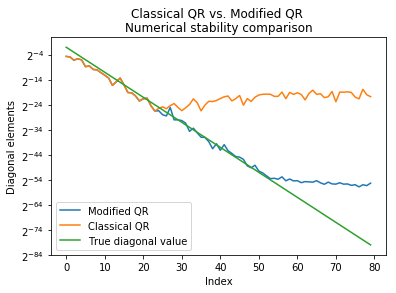

In [169]:
U, _ = np.linalg.qr(np.random.randn(80, 80))
V, _ = np.linalg.qr(np.random.randn(80, 80))
S = np.zeros((80, 80))
for i in range(80):
    S[i,i] = 2**(-(i+1))
A = np.matmul(np.matmul(U, S), V)
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

plt.semilogy(np.diag(Rm), basey = 2, label="Modified QR")
plt.semilogy(np.diag(Rc), basey = 2, label="Classical QR")
plt.semilogy(np.diag(S), basey = 2, label="True diagonal value")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Diagonal elements")
plt.title("Classical QR vs. Modified QR \nNumerical stability comparison")

We can conclude that the modified QR decomposition method is numerically more stable than the classical one.

In [170]:
#(b)
A = np.array([[.70000, .70711], [.70001, .70711]])
Q, R = qrhouse(A)
Qm, Rm = mgs(A)

print("Numerical error of Q by Householder QR is: ", np.linalg.norm(np.matmul(Q.T,Q)-np.eye(2)))
print("Numerical error of Q by Modified QR is: ", np.linalg.norm(np.matmul(Qm.T,Qm)-np.eye(2)))

Numerical error of Q by Householder QR is:  3.451616545114987e-16
Numerical error of Q by Modified QR is:  3.254726094493924e-11


We can conclude that the householder QR decomposition method is numerically more stable than the modified one.

In [171]:
##2.
def qrgivens(A):
    A = np.array(A, dtype = np.float64)
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    
    for j in range(min(m-1,n)):
        for i in range(m-1,j,-1):
            #Make Givens matrix
            x = R[j,j]
            y = R[i,j]          
            G = np.eye(m)
            if y == 0:
                pass 
            elif abs(x) <= abs(y):
                z = x/y
                s = 1/math.sqrt(1+z**2)
                G[j,j] = z*s #c
                G[j,i] = s
                G[i,j] = -s
                G[i,i] = z*s #c
            else:
                z = y/x
                c = 1/math.sqrt(1+z**2)
                G[j,j] = c
                G[j,i] = z*c  #s
                G[i,j] = -z*c #-s
                G[i,i] = c            
            R = np.matmul(G,R)
            Q = np.matmul(Q,G.T)
    return Q, R

In [172]:
A = np.array([[5,12,14], [9,0,17], [11,19,21]])
qrgivens(A)

(array([[ 0.331861655799986 , -0.4451584955874926, -0.8316860917533562],
        [ 0.5973509804399748,  0.7815291644795646, -0.179955470145463 ],
        [ 0.7300956427599693, -0.4370881820344198,  0.5252754263705407]]),
 array([[ 1.5066519173319366e+01,  1.7854157082039251e+01,
          3.0133038346638727e+01],
        [ 3.7368274290812678e-17, -1.3646577405703889e+01,
         -2.1250749647951155e+00],
        [ 1.6228679328800229e-16, -1.9631743865426287e-16,
         -3.6720643232385037e+00]]))

In [173]:
##3.
#(a)
def eig_simul(m,is_tri=False):
    for i in range(100):
        A = np.random.randn(m,m)/math.sqrt(m)
        if is_tri: 
            A = np.triu(A)
        L, V = np.linalg.eig(A)
        L = np.sort(L)
        Lr = L.real
        Li = L.imag
        plt.scatter(Lr,Li, s=1)
        circle = plt.Circle((0,0),1,fill=False)
        plt.gcf().gca().add_artist(circle)

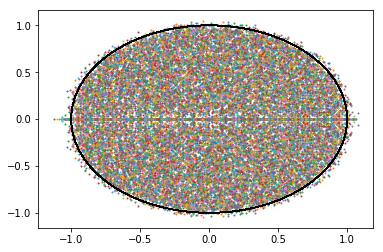

In [174]:
eig_simul(256)

The figure above implies that the spectral radius of A gets closer to 1 as m goes to infinity.

In [175]:
#(b)
def norm_simul(m,is_tri=False):
    norm_list = []
    for i in range(100):
        A = np.random.randn(m,m)/math.sqrt(m)
        if is_tri: 
            A = np.triu(A)
        norm_list.append(np.linalg.norm(A, ord=2))
    plt.boxplot(norm_list)

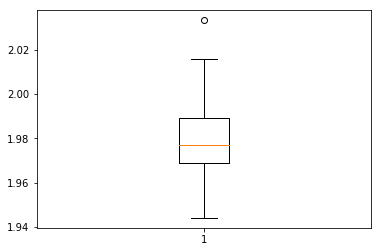

In [176]:
norm_simul(256)

In [177]:
#(b)
def minsv_simul(m,n,is_tri=False):
    minsv_list = []
    for i in range(100):
        A = np.random.randn(m,m)/math.sqrt(m)
        if is_tri: 
            A = np.triu(A)
        _, S, _ = np.linalg.svd(A)
        minsv_list.append(np.min(S))
    minsv_list = np.array(minsv_list)
    
    bins = [2**(-j) for j in range(n, -1, -1)]
    bins.insert(0,0)
    #for j in range(n+3,4,-1):
    #    bins.append(np.sum(.01*(minsv_list<2**(-j))))
    hist, _ = np.histogram(minsv_list, bins, density=False)
    cd = np.cumsum(hist)
    del bins[0]
    lg_bins = [math.log(x,2) for x in bins]
    plt.bar(lg_bins, cd)
    plt.xlabel("Singular value range")
    plt.ylabel("Cumulative frequency")

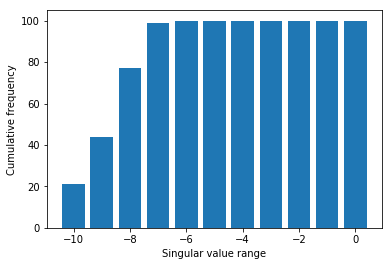

In [178]:
minsv_simul(256,10)

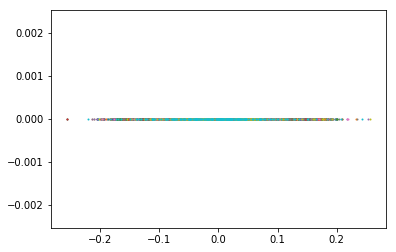

In [179]:
#(d)
eig_simul(256,True)

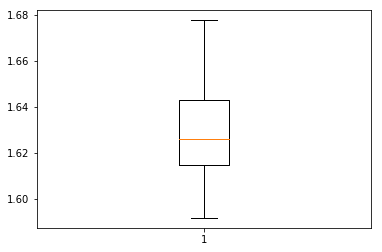

In [180]:
norm_simul(256,True)

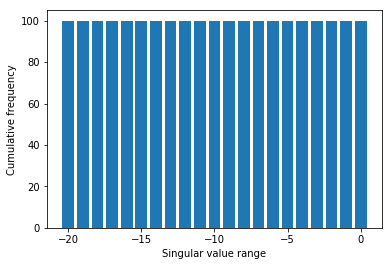

In [181]:
minsv_simul(256,20,True)

In [182]:
##4.
t = np.linspace(0,1,num=50)
A = np.vander(t,increasing=True)
A = A[:,:12]
b = np.cos(4*t)
np.set_printoptions(precision=16)

In [183]:
#(a)
x_normeq = np.linalg.solve(np.matmul(A.T,A),np.matmul(A.T,b))
print(x_normeq)

[ 9.9999999640658233e-01  1.0402268381033251e-06 -8.0000378272232879e+00
  5.3270253269172116e-04  1.0662806004134564e+01  1.6468090491389812e-02
 -5.7338792034135340e+00  8.5095548681068015e-02  1.5026045757718403e+00
  1.4757086539834277e-01 -4.3361548252232152e-01  9.8810074115828511e-02]


In [184]:
#(b)
Q, R = mgs(A)
x_mgs = np.linalg.solve(R, np.matmul(Q.T,b))
print(x_mgs)

[ 1.0000000022190916e+00 -7.8074185143097617e-07 -7.9999678133155632e+00
 -5.1637700826127702e-04  1.0670943116386765e+01 -2.0644528213106195e-02
 -5.6277256510836615e+00 -1.1075896950362038e-01  1.7354947164771368e+00
 -2.4810457718139882e-02 -3.6137479214330759e-01  8.5717914255122235e-02]


In [185]:
#(c)
Q, R = qrhouse(A)
Q = Q[:,:A.shape[1]]
R = R[:A.shape[1],:]
x_house = np.linalg.solve(R, np.matmul(Q.T,b))
print(x_house)

[ 1.0000000009966097e+00 -4.2274304927036326e-07 -7.9999812356852695e+00
 -3.1876323908722052e-04  1.0669430795956259e+01 -1.3820288255625876e-02
 -5.6470756265892330e+00 -7.5316025739887493e-02  1.6936069652089525e+00
  6.0321074388050098e-03 -3.7424170287276104e-01  8.8040575962524001e-02]


In [186]:
#(d)
Q, R = np.linalg.qr(A)
x_pyqr = np.linalg.solve(R, np.matmul(Q.T,b))
print(x_pyqr)

[ 1.0000000009965997e+00 -4.2274276230824498e-07 -7.9999812356901456e+00
 -3.1876319259339637e-04  1.0669430795684127e+01 -1.3820287224452070e-02
 -5.6470756291899269e+00 -7.5316021339196196e-02  1.6936069602770731e+00
  6.0321109469623274e-03 -3.7424170430570391e-01  8.8040576218254812e-02]


In [187]:
#(e)
x_lsq, _, _, _ = np.linalg.lstsq(A,b,rcond=None)
print(x_lsq)

[ 1.0000000009965992e+00 -4.2274274739563760e-07 -7.9999812356909734e+00
 -3.1876317892684514e-04  1.0669430795574110e+01 -1.3820286712444174e-02
 -5.6470756306740437e+00 -7.5316018574966948e-02  1.6936069569680066e+00
  6.0321134071664130e-03 -3.7424170533920342e-01  8.8040576405660001e-02]


In [188]:
#(f)
x_svd = np.matmul(np.linalg.pinv(A),b)
print(x_svd)

[ 1.0000000009965988e+00 -4.2274278655440867e-07 -7.9999812356898019e+00
 -3.1876320463197771e-04  1.0669430795722292e+01 -1.3820287451380864e-02
 -5.6470756294438615e+00 -7.5316021684557199e-02  1.6936069610528648e+00
  6.0321112396195531e-03 -3.7424170452868566e-01  8.8040576229104772e-02]


In [189]:
def highlight_wrong(r):
    return ['color: red' if i<2 else '' for i in range(6)]

In [190]:
#(g)
idx = ['NormalEq', 'MGS','Householder','Built-in QR', 'LeastNorm', 'SVD']
col_list = ['coeff_%d'%i for i in range(1,13)]
coeffs_tb = np.stack((x_normeq, x_mgs, x_house, x_pyqr, x_lsq, x_svd),axis=0)
coeffs_df = pd.DataFrame(coeffs_tb, index=idx, columns=col_list)
coeffs_df.apply(pd.to_numeric).style.\
    apply(highlight_wrong,axis=1).\
    set_precision(16)
print(coeffs_df)

             coeff_1       coeff_2   coeff_3   coeff_4    coeff_5   coeff_6  \
NormalEq         1.0  1.040227e-06 -8.000038  0.000533  10.662806  0.016468   
MGS              1.0 -7.807419e-07 -7.999968 -0.000516  10.670943 -0.020645   
Householder      1.0 -4.227430e-07 -7.999981 -0.000319  10.669431 -0.013820   
Built-in QR      1.0 -4.227428e-07 -7.999981 -0.000319  10.669431 -0.013820   
LeastNorm        1.0 -4.227427e-07 -7.999981 -0.000319  10.669431 -0.013820   
SVD              1.0 -4.227428e-07 -7.999981 -0.000319  10.669431 -0.013820   

              coeff_7   coeff_8   coeff_9  coeff_10  coeff_11  coeff_12  
NormalEq    -5.733879  0.085096  1.502605  0.147571 -0.433615  0.098810  
MGS         -5.627726 -0.110759  1.735495 -0.024810 -0.361375  0.085718  
Householder -5.647076 -0.075316  1.693607  0.006032 -0.374242  0.088041  
Built-in QR -5.647076 -0.075316  1.693607  0.006032 -0.374242  0.088041  
LeastNorm   -5.647076 -0.075316  1.693607  0.006032 -0.374242  0.088041  
SV